In [1]:
import pandas as pd
import glob

In [2]:
mylist = [f for f in glob.glob("aclImdb/train/neg/*.txt")]
negs = []
for item in mylist:
    f = open(item,'r')
    negs.append((f.read(),0))

In [3]:
mylist = [f for f in glob.glob("aclImdb/train/pos/*.txt")]
poss = []
for item in mylist:
    f = open(item,'r')
    poss.append((f.read(),1))

In [4]:
df_train = pd.DataFrame(negs)
df_train = df_train.append(poss)
df_train = df_train.rename(columns={0: 'sentences', 1: 'target'})
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train

,sentences,target
0,Will Farmer (Lanter) plays a computer game tha...,0
1,I love watching Jerry as much as the rest of t...,0
2,I was utterly disappointed by this movie. I ha...,0
3,haha! you have to just smile and smile if you ...,0
4,So often a band will get together for a re-uni...,1
...,...,...
24995,There are just so many things wrong with this ...,0
24996,Fully deserving its prestigious Hollywood awar...,1
24997,"I never much liked the Myra movie, tho I appre...",0
24998,Perfect for families with small children who a...,1


In [5]:
mylist = [f for f in glob.glob("aclImdb/test/neg/*.txt")]
negs = []
for item in mylist:
    f = open(item,'r')
    negs.append((f.read(),0))
    
mylist = [f for f in glob.glob("aclImdb/test/pos/*.txt")]
poss = []
for item in mylist:
    f = open(item,'r')
    poss.append((f.read(),1))

df_test = pd.DataFrame(negs)
df_test = df_test.append(poss)
df_test = df_test.rename(columns={0: 'sentences', 1: 'target'})
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test

,sentences,target
0,I suppose I like this film as well as any I kn...,1
1,...an incomprehensible script (when it shouldn...,0
2,"Personally, the book was a very well written, ...",0
3,'Don't Look In the Basement' is so easy to kno...,1
4,"Black Rain is a superb film, but watch out for...",1
...,...,...
24995,Subspecies is set in Romania where two America...,0
24996,I am really sad that that this film has got so...,1
24997,The net is an excellent movie! It's about Ange...,1
24998,"I was completely bored with this film, melodra...",0


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer='word',stop_words='english')
bow_transformer.fit(df_train['sentences'])

X_train = bow_transformer.transform(df_train['sentences'])
X_test  = bow_transformer.transform(df_test['sentences'])

In [12]:
X_train_arr = X_train[:10000].toarray()
X_test_arr = X_test[:10000].toarray()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

input_dim = X_train.shape[1]

model_clf = Sequential()
model_clf.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model_clf.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model_clf.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                752730    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 752,741
Trainable params: 752,741
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model_clf.fit(X_train_arr, df_train['target'][:10000],
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test_arr, df_test['target'][:10000]),
                    batch_size=64)

Epoch 1/15
157/157 [==============================] - 25s 147ms/step - loss: 0.4355 - accuracy: 0.8427 - val_loss: 0.3417 - val_accuracy: 0.8748
Epoch 2/15
157/157 [==============================] - 31s 197ms/step - loss: 0.1799 - accuracy: 0.9500 - val_loss: 0.3183 - val_accuracy: 0.8730
Epoch 3/15
157/157 [==============================] - 31s 196ms/step - loss: 0.0944 - accuracy: 0.9822 - val_loss: 0.3262 - val_accuracy: 0.8709
Epoch 4/15
157/157 [==============================] - 58s 369ms/step - loss: 0.0544 - accuracy: 0.9928 - val_loss: 0.3434 - val_accuracy: 0.8686
Epoch 5/15
157/157 [==============================] - 44s 272ms/step - loss: 0.0340 - accuracy: 0.9970 - val_loss: 0.3642 - val_accuracy: 0.8670
Epoch 6/15
157/157 [==============================] - 33s 203ms/step - loss: 0.0226 - accuracy: 0.9982 - val_loss: 0.3837 - val_accuracy: 0.8649
Epoch 7/15
157/157 [==============================] - 26s 162ms/step - loss: 0.0158 - accuracy: 0.9990 - val_loss: 0.4049 - val_ac

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

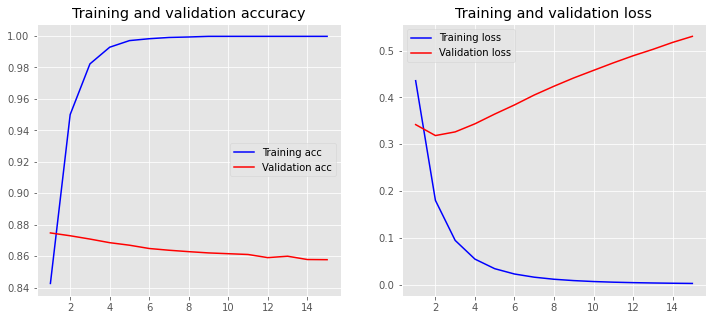

In [19]:
plot_history(history)

In [20]:
loss, accuracy = model_clf.evaluate(X_train_arr, df_train['target'][:10000], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

Training Accuracy: 0.9997
Training Loss: 0.0021


In [21]:
loss, accuracy = model_clf.evaluate(X_test_arr, df_test['target'][:10000], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Testing Accuracy:  0.8578
Testing Loss:  0.5302


# using tfidf

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(X_train)

train_tfidf = tfidf_transformer.transform(X_train)
test_tfidf = tfidf_transformer.transform(X_test)

In [32]:
del(X_test_arr)
del(X_train_arr)

In [30]:
train_tfidf_arr = train_tfidf[:10000].toarray()
test_tfidf_arr = test_tfidf[:10000].toarray()

In [33]:
input_dim = train_tfidf_arr .shape[1]

model_clf2 = Sequential()
model_clf2.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model_clf2.add(layers.Dense(1, activation='sigmoid'))

model_clf2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model_clf2.summary()

history2 = model_clf2.fit(train_tfidf_arr , df_train['target'][:10000],
                    epochs=15,
                    verbose=True,
                    validation_data=(test_tfidf_arr , df_test['target'][:10000]),
                    batch_size=64)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                752730    
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 752,741
Trainable params: 752,741
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
157/157 [==============================] - 48s 249ms/step - loss: 0.6390 - accuracy: 0.8143 - val_loss: 0.5756 - val_accuracy: 0.8521
Epoch 2/15
157/157 [==============================] - 16s 99ms/step - loss: 0.4553 - accuracy: 0.9138 - val_loss: 0.4480 - val_accuracy: 0.8614
Epoch 3/15
157/157 [==============================] - 5s 31ms/step - loss: 0.3019 - accuracy: 0.9422 - val_loss: 0.3762 - val_accuracy: 0.8677
Epoch 4/15
1

Training Accuracy: 0.9997
Training Loss: 0.0116
Testing Accuracy:  0.8608
Testing Loss:  0.3376


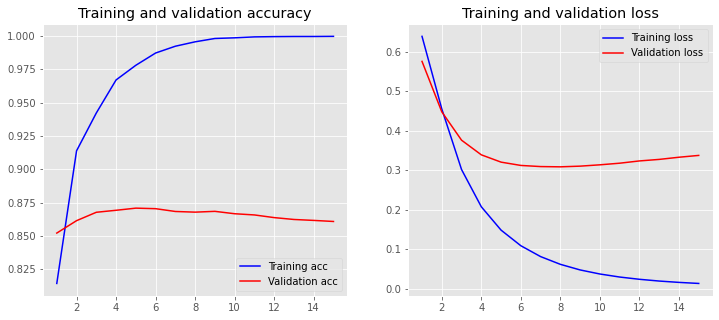

In [34]:
plot_history(history2)

loss, accuracy = model_clf2.evaluate(train_tfidf_arr, df_train['target'][:10000], verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = model_clf2.evaluate(test_tfidf_arr, df_test['target'][:10000], verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))